# Sound Classification Using Deep Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prerequisites 

In [5]:
!pip install pyaudio
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyAudio-0.2.13.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/ # copy kaggle json file to directory
! chmod 600 ~/.kaggle/ kaggle.json # permission for the json to act 
print('done')
# ! kaggle datasets list # 
!kaggle datasets download -d chrisfilo/urbansound8k

mkdir: cannot create directory ‘/root/.kaggle’: File exists
done
100% 5.60G/5.61G [01:16<00:00, 55.3MB/s]
100% 5.61G/5.61G [01:16<00:00, 78.8MB/s]


In [ ]:
!unzip '/content/urbansound8k.zip'


In [7]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline
from IPython.display import Audio
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Loading the data 

In [8]:
df = pd.read_csv('/content/UrbanSound8K.csv')
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


# Data Visualisation and EDA

In [12]:
filename= '/content/fold5/100032-3-0-0.wav'

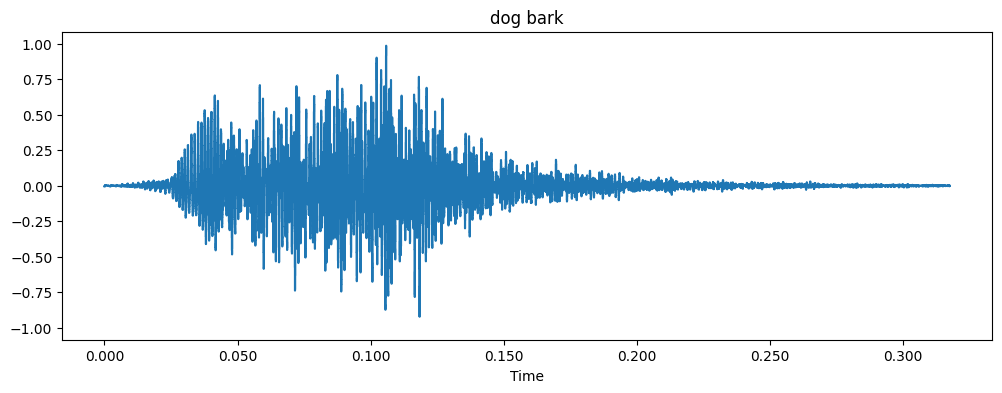

In [11]:
plt.figure(figsize=(12,4))
plt.title('dog bark')
data,sample_rate = librosa.load(filename)
# librosa.display.waveplot(data,sr=sample_rate)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [ ]:
data

array([-0.00347107, -0.00501926, -0.00465449, ..., -0.00248442,
       -0.00154777, -0.00035547], dtype=float32)

In [ ]:
sample_rate

22050

In [ ]:
df['class'].value_counts()


dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [ ]:
audio_file = '/content/fold5/100263-2-0-3.wav'
lib_audio_data, lib_sample_rate = librosa.load(audio_file)

In [ ]:
print(lib_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


Text(0.5, 1.0, 'Audio file with 1 channels')

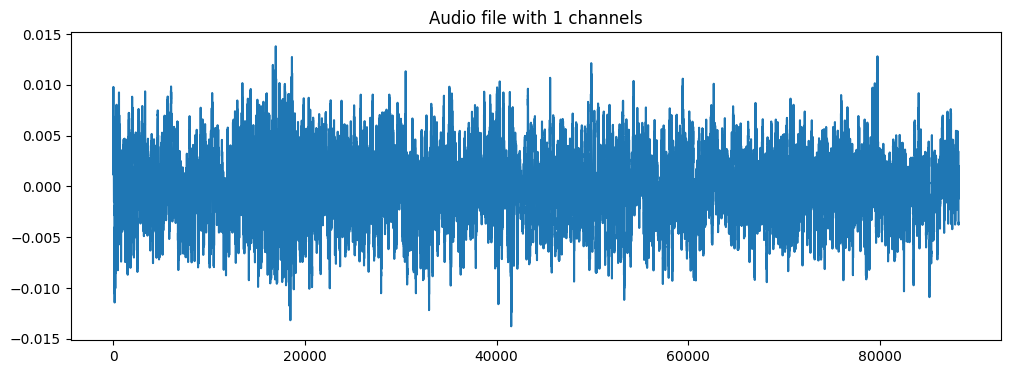

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(lib_audio_data)

ipd.Audio(audio_file)
plt.title('Audio file with 1 channels')


In [ ]:

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file) 

In [ ]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

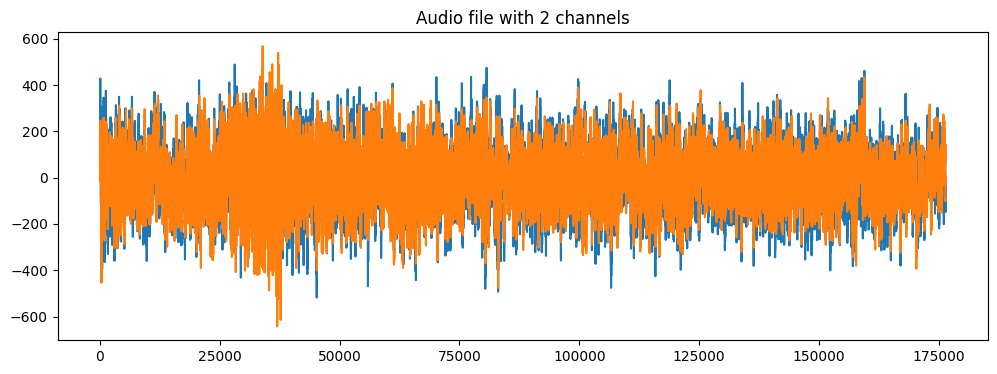

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(wave_audio)
plt.title('Audio file with 2 channels')
ipd.Audio(audio_file)

# Feature Extraction

In [ ]:
mfccs = librosa.feature.mfcc(y=lib_audio_data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [ ]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085269e+02],
       [ 1.1530264e+02,  1.1144248e+02,  1.1125225e+02, ...,
         1.1112500e+02,  1.1057969e+02,  1.0299151e+02],
       [-1.8326145e+01, -2.4682449e+01, -3.0259777e+01, ...,
        -8.2357597e+00, -9.0665245e+00, -4.5019588e+00],
       ...,
       [-2.8760364e+00, -3.2479844e+00, -4.8965559e+00, ...,
        -5.2024126e-01,  3.5672538e+00,  7.4937549e+00],
       [-4.2968613e-01, -5.8838451e-01, -8.1723857e-01, ...,
         1.8340701e-01,  7.6732528e-01,  2.7120016e+00],
       [-1.1780679e+00,  6.9809175e-01,  6.3521585e+00, ...,
        -2.6222010e+00, -4.7912731e+00, -3.1826334e+00]], dtype=float32)

In [ ]:
audio_file_2 = '/content/fold1/101415-3-0-2.wav'
lib_audio_data1, lib_sample_rate = librosa.load(audio_file_2)

In [ ]:
mfccs = librosa.feature.mfcc(y=lib_audio_data1, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [ ]:
mfccs

array([[-5.2506586e+02, -5.1955695e+02, -5.1864276e+02, ...,
        -4.3568549e+02, -3.8558670e+02, -3.0779324e+02],
       [ 9.1999207e+00,  1.6759439e+01,  1.8103909e+01, ...,
         1.1375923e+02,  1.4776443e+02,  1.3558249e+02],
       [ 8.8355551e+00,  1.5750109e+01,  1.7259296e+01, ...,
         6.4274643e+01,  4.9179779e+01,  3.2849552e+01],
       ...,
       [ 4.3309429e-01, -3.5408905e+00, -4.8356504e+00, ...,
        -5.2699099e+00, -1.2849571e-01,  7.5349283e-01],
       [ 4.4520628e-01, -3.2774835e+00, -4.6472917e+00, ...,
        -3.4224064e+00,  3.9007013e+00,  5.5314279e-01],
       [ 3.5697088e-01, -2.9899063e+00, -4.4125957e+00, ...,
        -2.6713343e+00,  2.7894566e+00,  1.4206086e-01]], dtype=float32)

In [ ]:
type(mfccs)

numpy.ndarray

In [ ]:
audio_dataset_path = '/content'

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
# audio_dataset_path = '/content'

In [ ]:
import numpy as np
import os
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

8732it [05:56, 24.50it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-211.93698, 62.581215, -122.813156, -60.74529...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690285,...",children_playing
5,"[-441.0859, 108.92061, -25.777704, 47.518364, ...",children_playing
6,"[-469.41965, 109.28011, -18.456553, 46.043015,...",children_playing
7,"[-457.14645, 106.52766, -19.124525, 39.871788,...",children_playing
8,"[-466.2641, 118.13225, -29.881447, 50.494637, ...",children_playing
9,"[-188.62563, 102.429115, -2.3306003, -10.94615...",car_horn


# Train test split

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
# y = np.array(pd.get_dummies(y))

In [ ]:
y.shape

(8732, 10)

In [ ]:
X.shape


(8732, 40)

In [ ]:
y.shape


(8732,)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print('x_train shape:',X_train.shape,'\nx_test shape:',X_test.shape)


x_train shape: (6985, 40) 
x_test shape: (1747, 40)


In [ ]:
print('y_train shape:',y_train.shape,'\ny_test shape:',y_test.shape)


y_train shape: (6985, 10) 
y_test shape: (1747, 10)


In [ ]:
X_train

array([[-1.24484680e+02,  1.03169846e+02, -1.33165455e+01, ...,
         4.72908735e+00, -2.91925502e+00,  4.36318684e+00],
       [-5.13921928e+00,  7.90478210e+01,  4.16248989e+00, ...,
        -3.44017577e+00, -5.19278288e+00, -1.54999745e+00],
       [-4.03939552e+01, -1.31092958e+01, -7.20987606e+00, ...,
         1.99475360e+00, -8.70601475e-01,  2.89561915e+00],
       ...,
       [-4.26655701e+02,  9.15513382e+01,  4.19170332e+00, ...,
         9.74399447e-01,  5.15445352e-01,  9.15374696e-01],
       [-1.37251968e+02,  1.24268539e+02, -2.15997734e+01, ...,
         1.25008607e+00, -1.89575088e+00, -9.01497304e-01],
       [-4.18389374e+02,  2.06862305e+02,  7.23461866e+00, ...,
        -3.98612142e+00, -4.71784544e+00, -2.78925627e-01]], dtype=float32)

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

# Creating model

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]
print(num_labels)

10


In [ ]:
from tensorflow.keras import models,layers


In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

In [ ]:
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.h5', 
                               verbose=1, save_best_only=True)
start = datetime.now()



model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)
print('training completed time:', start)

Epoch 1/100
210/219 [===========================>..] - ETA: 0s - loss: 0.9165 - accuracy: 0.6866
Epoch 1: val_loss improved from inf to 0.70593, saving model to saved_models/audio_classification.h5
219/219 [==============================] - 1s 4ms/step - loss: 0.9148 - accuracy: 0.6869 - val_loss: 0.7059 - val_accuracy: 0.7699
Epoch 2/100
217/219 [============================>.] - ETA: 0s - loss: 0.9303 - accuracy: 0.6855
Epoch 2: val_loss did not improve from 0.70593
219/219 [==============================] - 1s 4ms/step - loss: 0.9294 - accuracy: 0.6855 - val_loss: 0.7194 - val_accuracy: 0.7813
Epoch 3/100
208/219 [===========================>..] - ETA: 0s - loss: 0.9051 - accuracy: 0.6913
Epoch 3: val_loss did not improve from 0.70593
219/219 [==============================] - 1s 4ms/step - loss: 0.9091 - accuracy: 0.6915 - val_loss: 0.7062 - val_accuracy: 0.7848
Epoch 4/100
218/219 [============================>.] - ETA: 0s - loss: 0.9174 - accuracy: 0.6971
Epoch 4: val_loss did no

# Result

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7904980182647705


In [ ]:
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

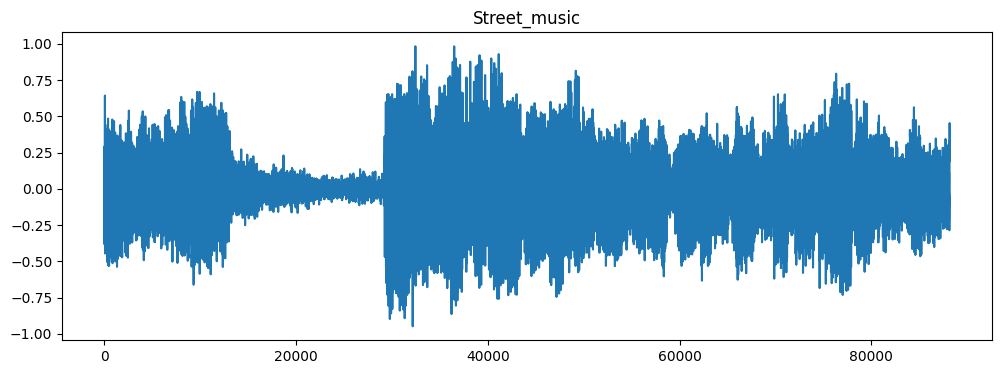

In [ ]:
# filename_="/content/fold6/99710-9-0-6.wav"

plt.figure(figsize = (12,4))
# plt.plot(audio_file)
plt.plot(lib_audio_data)

plt.title('Street_music')
ipd.Audio(audio_file_3)